In [2]:
import string
import numpy as np
import csv
import pandas as pd


In [3]:
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if substring in big_string:
            return substring
    #print(substring)
    return np.nan

In [4]:
title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
            'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
            'Don', 'Jonkheer']


In [5]:
file_content=[]

with open('./train.csv') as csvfile:
    file = csv.reader(csvfile)
    for eachline in file:
        file_content.append(eachline)

In [6]:
df=pd.DataFrame(file_content)

In [7]:
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header

In [8]:
df['FamilySize'] = pd.to_numeric(df['SibSp'])+pd.to_numeric(df['Parch'])

In [9]:
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
df['Deck']=df['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))

In [10]:
df = df.replace(to_replace = np.NaN, value=0)

In [11]:
df = df.replace(to_replace = '',value = 0)

In [12]:
df = df.replace(to_replace = "male", value = 1)

In [13]:
df = df.replace(to_replace = "female",value = 2)

In [14]:
##Cherbourg 1
##Queenstown 2
##Southampton 3

df['Embarked'] = df['Embarked'].replace(to_replace = "C",value = 1)
df['Embarked'] = df['Embarked'].replace(to_replace = "Q",value = 2)
df['Embarked'] = df['Embarked'].replace(to_replace = "S",value = 3)

In [15]:
df['Fare'] = pd.to_numeric(df['Fare'])
df['Age'] = pd.to_numeric(df['Age'])

In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Deck
1,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,3,1,0
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,1,1,C
3,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,0,3,0,0
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,3,1,C
5,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,3,0,0
6,6,0,3,"Moran, Mr. James",1,0.0,0,0,330877,8.4583,0,2,0,0
7,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,3,0,E
8,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,0,3,4,0
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,27.0,0,2,347742,11.1333,0,3,2,0
10,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",2,14.0,1,0,237736,30.0708,0,1,1,0


In [17]:
new_df = df[['PassengerId','Pclass','Sex','Age','Embarked','Fare','FamilySize','Survived']]

In [18]:
new_df

,PassengerId,Pclass,Sex,Age,Embarked,Fare,FamilySize,Survived
1,1,3,1,22.0,3,7.2500,1,0
2,2,1,2,38.0,1,71.2833,1,1
3,3,3,2,26.0,3,7.9250,0,1
4,4,1,2,35.0,3,53.1000,1,1
5,5,3,1,35.0,3,8.0500,0,0
6,6,3,1,0.0,2,8.4583,0,0
7,7,1,1,54.0,3,51.8625,0,0
8,8,3,1,2.0,3,21.0750,4,0
9,9,3,2,27.0,3,11.1333,2,1
10,10,2,2,14.0,1,30.0708,1,1


In [19]:
import matplotlib.pyplot as plt

[]

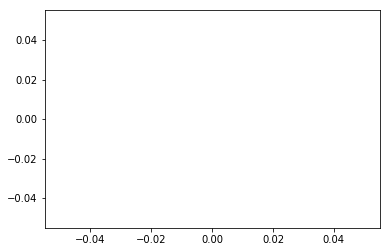

In [20]:
plt.plot()

In [21]:
data = new_df[['PassengerId','Pclass','Sex','Age','Embarked','Fare','FamilySize']]

In [22]:
prediction = new_df[['Survived']]

In [23]:
data_train = data[0:int(0.8*len(data))]
prediction_train = prediction[0:int(0.8*len(data))]
data_test = data[int(0.8*len(data)):]
prediction_test = prediction[int(0.8*len(data)):]

In [24]:
from sklearn import svm

clf = svm.SVC(kernel='linear',C=0.1)

In [25]:
clf.fit(data,prediction)

C:\Users\Crest\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
pred_sur = clf.predict(data_test[['PassengerId','Pclass','Sex','Age','Embarked','Fare','FamilySize']])

In [27]:
pred_sur

array(['0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0',
       '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0',
       '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1',
       '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1',
       '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0',
       '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0',
       '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0',
       '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0',
       '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1',
       '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '1', '1', '0',
       '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1',
       '0', '1', '0', '0', '1', '0', '1', '1', '0', '0'], dtype=

In [28]:
from sklearn.metrics import accuracy_score

print(accuracy_score(pred_sur,prediction_test))

0.7988826815642458
